In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dataset = pd.read_csv('klm.csv')
dataset

Date  Adjusted Passenger Count
0    2005-07-01                      9587
1    2005-08-01                      9881
2    2005-09-01                      9513
3    2005-10-01                      9113
4    2005-11-01                      7110
..          ...                       ...
124  2015-11-01                      7366
125  2015-12-01                      7321
126  2016-01-01                      5930
127  2016-02-01                      5338
128  2016-03-01                      7726

[129 rows x 2 columns]

In [2]:
passengers=dataset['Adjusted Passenger Count']
passengers=np.array(passengers)

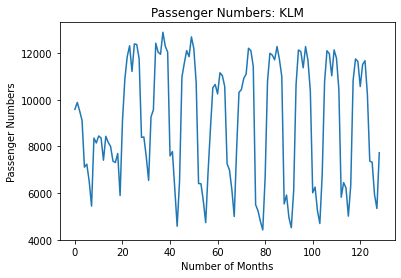

In [3]:
plt.plot(passengers)
plt.title("Passenger Numbers: KLM")
plt.xlabel("Number of Months")
plt.ylabel("Passenger Numbers")
plt.show()

In [4]:
# https://github.com/facebook/prophet/issues/1072
from fbprophet import Prophet
Prophet()

In [5]:
train_df=dataset[:115]
train_df

Date  Adjusted Passenger Count
0    2005-07-01                      9587
1    2005-08-01                      9881
2    2005-09-01                      9513
3    2005-10-01                      9113
4    2005-11-01                      7110
..          ...                       ...
110  2014-09-01                     11774
111  2014-10-01                     10433
112  2014-11-01                      5822
113  2014-12-01                      6447
114  2015-01-01                      6222

[115 rows x 2 columns]

In [6]:
test_df=dataset[115:129]
test_df

Date  Adjusted Passenger Count
115  2015-02-01                      5012
116  2015-03-01                      6327
117  2015-04-01                     10831
118  2015-05-01                     11745
119  2015-06-01                     11633
120  2015-07-01                     10562
121  2015-08-01                     11510
122  2015-09-01                     11669
123  2015-10-01                     10221
124  2015-11-01                      7366
125  2015-12-01                      7321
126  2016-01-01                      5930
127  2016-02-01                      5338
128  2016-03-01                      7726

In [7]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = train_df['Date']
train_dataset['y']= train_df['Adjusted Passenger Count']
train_dataset.head(115)

ds      y
0    2005-07-01   9587
1    2005-08-01   9881
2    2005-09-01   9513
3    2005-10-01   9113
4    2005-11-01   7110
..          ...    ...
110  2014-09-01  11774
111  2014-10-01  10433
112  2014-11-01   5822
113  2014-12-01   6447
114  2015-01-01   6222

[115 rows x 2 columns]

In [8]:
from fbprophet.plot import plot_plotly

import plotly.offline as py
py.init_notebook_mode()

In [9]:
# Prophet Model 1
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
# Prophet Model 2
# prophet_basic = Prophet(seasonality_mode='additive')
# prophet_basic.add_seasonality('eight_months', period=8, fourier_order=25)
# prophet_basic.fit(train_dataset)

In [11]:
future= prophet_basic.make_future_dataframe(periods=14, freq='M')
future.tail(15)

ds
114 2015-01-01
115 2015-01-31
116 2015-02-28
117 2015-03-31
118 2015-04-30
119 2015-05-31
120 2015-06-30
121 2015-07-31
122 2015-08-31
123 2015-09-30
124 2015-10-31
125 2015-11-30
126 2015-12-31
127 2016-01-31
128 2016-02-29

In [12]:
forecast=prophet_basic.predict(future)

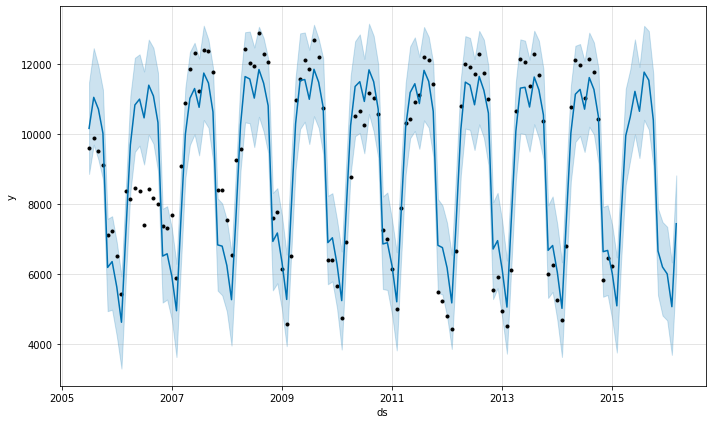

In [13]:
fig1 =prophet_basic.plot(forecast)

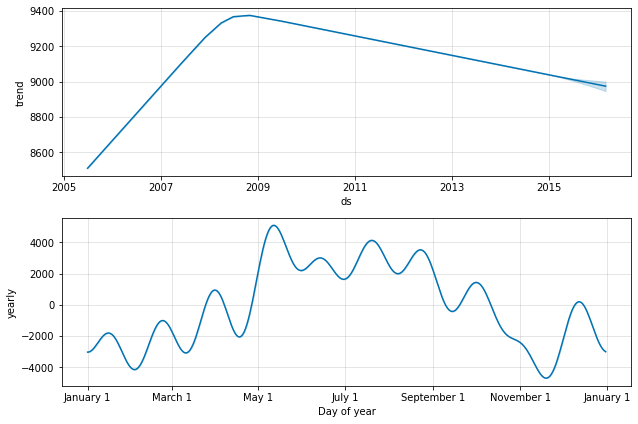

In [14]:
fig1 = prophet_basic.plot_components(forecast)

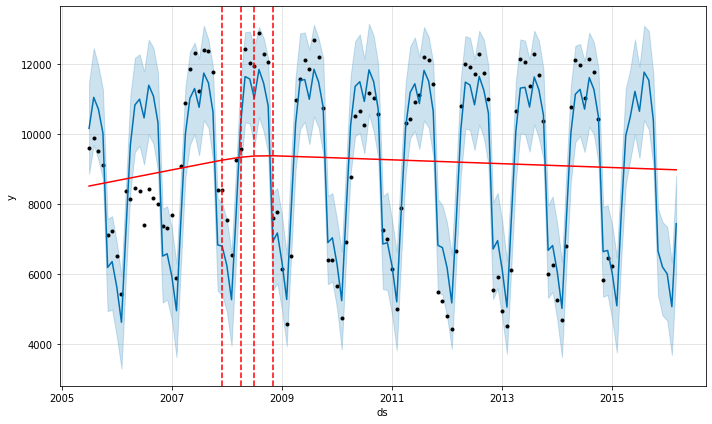

In [15]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [16]:
prophet_basic.changepoints

4    2005-11-01
7    2006-02-01
11   2006-06-01
15   2006-10-01
18   2007-01-01
22   2007-05-01
25   2007-08-01
29   2007-12-01
33   2008-04-01
36   2008-07-01
40   2008-11-01
44   2009-03-01
47   2009-06-01
51   2009-10-01
55   2010-02-01
58   2010-05-01
62   2010-09-01
66   2011-01-01
69   2011-04-01
73   2011-08-01
76   2011-11-01
80   2012-03-01
84   2012-07-01
87   2012-10-01
91   2013-02-01
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


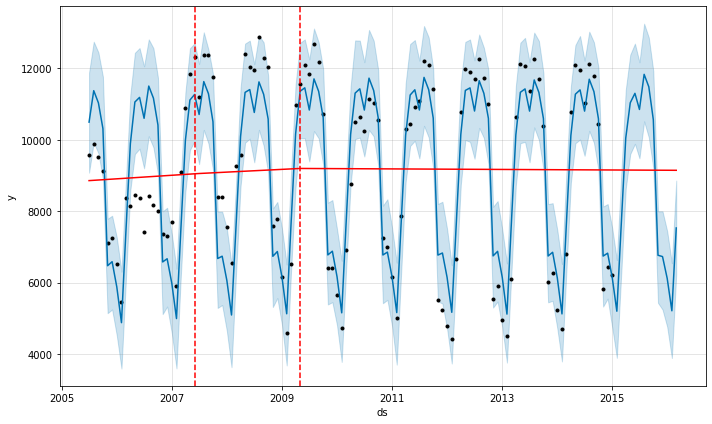

In [17]:
pro_change= Prophet(n_changepoints=4)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

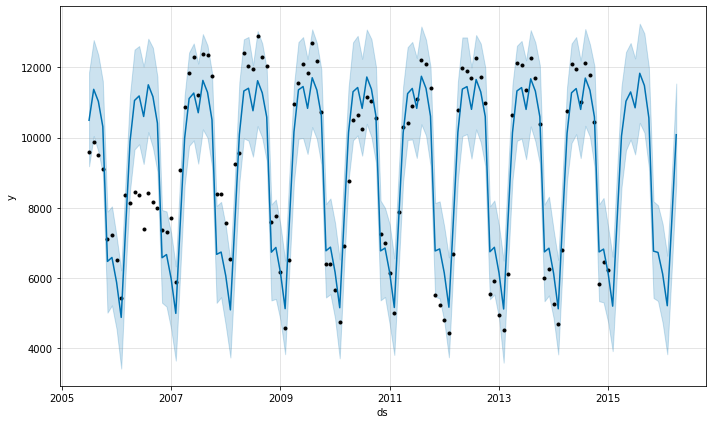

In [18]:
# pro_change.fit(train_dataset)
future_data = pro_change.make_future_dataframe(periods=15, freq = 'm')
 
#forecast the data for future data
forecast_data = pro_change.predict(future_data)
pro_change.plot(forecast_data);

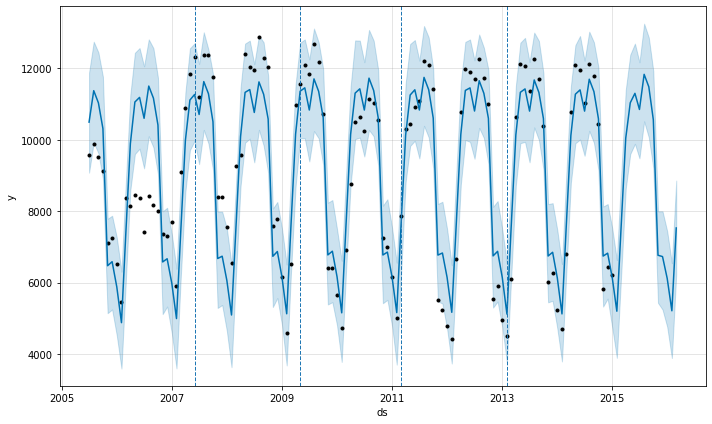

In [19]:
import matplotlib.pyplot as plt

figure = pro_change.plot(forecast)
for changepoint in pro_change.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

In [20]:
forecast_data

ds        trend    yhat_lower    yhat_upper  trend_lower  \
0   2005-07-01  8856.111788   9182.716822  11860.537124  8856.111788   
1   2005-08-01  8864.650226  10045.126264  12779.874655  8864.650226   
2   2005-09-01  8873.188663   9604.132446  12355.925136  8873.188663   
3   2005-10-01  8881.451668   8977.190873  11611.086839  8881.451668   
4   2005-11-01  8889.990106   5010.397675   7891.412476  8889.990106   
..         ...          ...           ...           ...          ...   
125 2015-11-30  9147.019052   5344.170765   8070.089195  9142.620518   
126 2015-12-31  9146.378456   4720.397082   7542.002253  9140.125752   
127 2016-01-31  9145.737860   3825.371222   6637.007055  9137.043020   
128 2016-02-29  9145.138592   6161.123616   8839.679634  9133.848920   
129 2016-03-31  9144.497996   8672.313376  11540.836858  9131.260449   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    8856.111788     1638.817543           1638.817543           1638.817543   
1    8864.650226     2511.632200           2511.632200           2511.632200   
2    8873.188663     2161.862853           2161.862853           2161.862853   
3    8881.451668     1431.895825           1431.895825           1431.895825   
4    8889.990106    -2418.690721          -2418.690721          -2418.690721   
..           ...             ...                   ...                   ...   
125  9153.267034    -2419.472266          -2419.472266          -2419.472266   
126  9154.641319    -3029.786071          -3029.786071          -3029.786071   
127  9156.002096    -3937.208245          -3937.208245          -3937.208245   
128  9157.487601    -1616.354022          -1616.354022          -1616.354022   
129  9158.801927      938.367793            938.367793            938.367793   

          yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0    1638.817543   1638.817543   1638.817543                   0.0   
1    2511.632200   2511.632200   2511.632200                   0.0   
2    2161.862853   2161.862853   2161.862853                   0.0   
3    1431.895825   1431.895825   1431.895825                   0.0   
4   -2418.690721  -2418.690721  -2418.690721                   0.0   
..           ...           ...           ...                   ...   
125 -2419.472266  -2419.472266  -2419.472266                   0.0   
126 -3029.786071  -3029.786071  -3029.786071                   0.0   
127 -3937.208245  -3937.208245  -3937.208245                   0.0   
128 -1616.354022  -1616.354022  -1616.354022                   0.0   
129   938.367793    938.367793    938.367793                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0  10494.929331  
1                           0.0                         0.0  11376.282426  
2                           0.0                         0.0  11035.051516  
3                           0.0                         0.0  10313.347493  
4                           0.0                         0.0   6471.299385  
..                          ...                         ...           ...  
125                         0.0                         0.0   6727.546787  
126                         0.0                         0.0   6116.592385  
127                         0.0                         0.0   5208.529614  
128                         0.0                         0.0   7528.784570  
129                         0.0                         0.0  10082.865788  

[130 rows x 16 columns]

In [21]:
yhat=forecast_data['yhat']

In [22]:
yhat

0      10494.929331
1      11376.282426
2      11035.051516
3      10313.347493
4       6471.299385
           ...     
125     6727.546787
126     6116.592385
127     5208.529614
128     7528.784570
129    10082.865788
Name: yhat, Length: 130, dtype: float64

In [23]:
yhat14=yhat[115:129]
yhat14

115     5196.380192
116     7529.747343
117    10046.680436
118    11037.548449
119    11301.565002
120    10849.806179
121    11834.239991
122    11485.242463
123    10561.456639
124     6764.714207
125     6727.546787
126     6116.592385
127     5208.529614
128     7528.784570
Name: yhat, dtype: float64

In [24]:
passenger_test=test_df['Adjusted Passenger Count']
passenger_test

115     5012
116     6327
117    10831
118    11745
119    11633
120    10562
121    11510
122    11669
123    10221
124     7366
125     7321
126     5930
127     5338
128     7726
Name: Adjusted Passenger Count, dtype: int64

In [25]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

mda(passenger_test, yhat14)

0.8571428571428571

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(passenger_test, yhat14)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 524.263928


In [27]:
forecast_error = (passenger_test-yhat14)
forecast_error

115    -184.380192
116   -1202.747343
117     784.319564
118     707.451551
119     331.434998
120    -287.806179
121    -324.239991
122     183.757537
123    -340.456639
124     601.285793
125     593.453213
126    -186.592385
127     129.470386
128     197.215430
dtype: float64

In [28]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

71.58326743881493

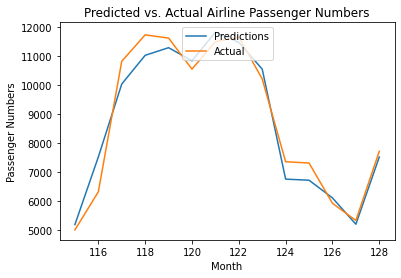

In [29]:
import matplotlib.pyplot as plt

predictons, =plt.plot(yhat14, label='Predictions')
actual, =plt.plot(passenger_test, label='Actual')
plt.xlabel('Month')
plt.ylabel('Passenger Numbers')
plt.title("Predicted vs. Actual Airline Passenger Numbers")
plt.legend(loc = 'upper center')
plt.show()

In [30]:
np.mean(passenger_test)

8799.357142857143